In [2]:
import pandas as pd
import numpy as np
import os
import pickle

In [14]:
#pd.read_pickle('../02.cleaning/aggregated_country_streams.pkl')
df=pd.read_csv('../02.cleaning/aggregated_country_streams.csv', header=1)
df


,country,AUT,BEL,BGR,CYP,CZE,DEU,DNK,ESP,EST,...,ITA,LTU,LUX,LVA,NLD,POL,PRT,ROU,SVK,SWE
0,date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-08-24,10301612.0,12348795.0,985485.0,328417.0,4869155.0,142899503.0,24716696.0,98020022.0,1438969.0,...,90166128.0,1420563.0,736943.0,1507392.0,67114943.0,25430818.0,8730023.0,1958986.0,1745234.0,51913587.0
2,2018-08-31,9508616.0,12634840.0,1136095.0,384379.0,5207132.0,148764686.0,25975199.0,98106210.0,1498797.0,...,91402156.0,1465384.0,796085.0,1629058.0,75928950.0,24843040.0,9444484.0,2391996.0,2024877.0,55020209.0
3,2018-09-07,9717264.0,12538824.0,1043073.0,340697.0,5010547.0,142763299.0,26251701.0,93060881.0,1435962.0,...,94729362.0,1428749.0,775400.0,1602453.0,80271104.0,24352976.0,9183448.0,2108987.0,1975851.0,52755183.0
4,2018-09-14,9794815.0,12994948.0,1011482.0,365756.0,5432395.0,151528074.0,26286642.0,92130930.0,1402195.0,...,101696079.0,1434227.0,800165.0,1603317.0,79581894.0,24416983.0,9055023.0,2152635.0,1982482.0,53277596.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,2020-07-17,12421511.0,18756779.0,1652278.0,672939.0,8650267.0,192973906.0,24857104.0,129972855.0,1604794.0,...,150763589.0,2023396.0,1098099.0,1756952.0,79974559.0,46932600.0,12428079.0,4881788.0,3702849.0,51264443.0
101,2020-07-24,13113467.0,17877532.0,1655013.0,653948.0,8489350.0,204359911.0,24002152.0,133557551.0,1622579.0,...,143537025.0,1944948.0,1073889.0,1722492.0,77735951.0,46899327.0,12499879.0,4717513.0,3551557.0,48374556.0
102,2020-07-31,12969684.0,18737612.0,1623495.0,648896.0,8505070.0,210775980.0,27628788.0,129858215.0,1610297.0,...,137836879.0,2018704.0,1068540.0,1720200.0,77669240.0,46117945.0,12343812.0,4629858.0,3566775.0,49724046.0
103,2020-08-07,12687619.0,18352306.0,1640165.0,661870.0,8616465.0,200822741.0,27084223.0,125794563.0,1585776.0,...,135482731.0,2032788.0,1048094.0,1720678.0,74686908.0,46965173.0,12326090.0,4636635.0,3936437.0,49391231.0


In [15]:
df = df.set_index('country')
df

,AUT,BEL,BGR,CYP,CZE,DEU,DNK,ESP,EST,FIN,...,ITA,LTU,LUX,LVA,NLD,POL,PRT,ROU,SVK,SWE
country,,,,,,,,,,,,,,,,,,,,,
date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-24,10301612.0,12348795.0,985485.0,328417.0,4869155.0,142899503.0,24716696.0,98020022.0,1438969.0,21122683.0,...,90166128.0,1420563.0,736943.0,1507392.0,67114943.0,25430818.0,8730023.0,1958986.0,1745234.0,51913587.0
2018-08-31,9508616.0,12634840.0,1136095.0,384379.0,5207132.0,148764686.0,25975199.0,98106210.0,1498797.0,21368063.0,...,91402156.0,1465384.0,796085.0,1629058.0,75928950.0,24843040.0,9444484.0,2391996.0,2024877.0,55020209.0
2018-09-07,9717264.0,12538824.0,1043073.0,340697.0,5010547.0,142763299.0,26251701.0,93060881.0,1435962.0,21121857.0,...,94729362.0,1428749.0,775400.0,1602453.0,80271104.0,24352976.0,9183448.0,2108987.0,1975851.0,52755183.0
2018-09-14,9794815.0,12994948.0,1011482.0,365756.0,5432395.0,151528074.0,26286642.0,92130930.0,1402195.0,21057084.0,...,101696079.0,1434227.0,800165.0,1603317.0,79581894.0,24416983.0,9055023.0,2152635.0,1982482.0,53277596.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-17,12421511.0,18756779.0,1652278.0,672939.0,8650267.0,192973906.0,24857104.0,129972855.0,1604794.0,18995322.0,...,150763589.0,2023396.0,1098099.0,1756952.0,79974559.0,46932600.0,12428079.0,4881788.0,3702849.0,51264443.0
2020-07-24,13113467.0,17877532.0,1655013.0,653948.0,8489350.0,204359911.0,24002152.0,133557551.0,1622579.0,18116061.0,...,143537025.0,1944948.0,1073889.0,1722492.0,77735951.0,46899327.0,12499879.0,4717513.0,3551557.0,48374556.0
2020-07-31,12969684.0,18737612.0,1623495.0,648896.0,8505070.0,210775980.0,27628788.0,129858215.0,1610297.0,17813467.0,...,137836879.0,2018704.0,1068540.0,1720200.0,77669240.0,46117945.0,12343812.0,4629858.0,3566775.0,49724046.0


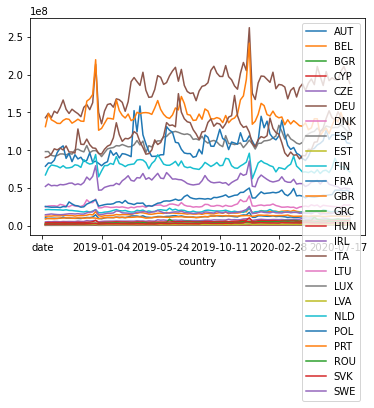

In [13]:
df.plot()

Text(0.5, 1.0, 'Streams through time')

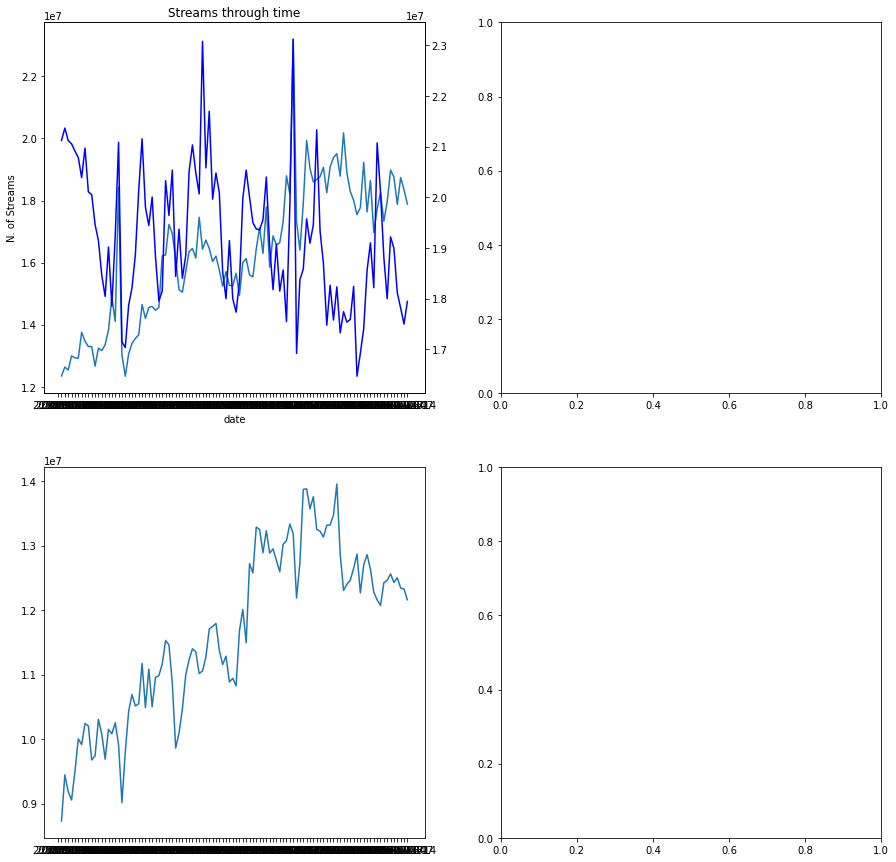

In [30]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs[0, 0].plot(df.index, df['BEL'])
ax2 = axs[0, 0].twinx()
ax2.plot(df.index, df['FIN'], color='b')

axs[1,0].plot(df.index, df['PRT'])

axs[0, 0].set_xlabel('date')
axs[0, 0].set_ylabel('N. of Streams')
axs[0, 0].set_title(r'Streams through time')